# **Capitulo 3 - Jennfier Paola Loaiza Rada GRUPO 1**

<p> Ejericicos <p>

<p> 1. Realizar una depuración de calidad sobre la base de datos y construir los indicadores entre algunos otros para mejorar el proceso de análisis de información<p>

<p> 2. Procesamiento de matrices y vectores en ML <p>

<p> 3. Explotar modelo más utilizado en sector financiero como referencia a Retail <p>

<p> 4. Identificar el funcionamiento y el uso de los modelos de fuga de clientes (churn) <p>


<p> Se importa la libreía necesaria y se carga la base de datos para comenzar con el análisis de la calidad de los datos <p>

In [1]:
# Importación de la libería necesaria para el análsis descriptivo
from matplotlib.ticker import FuncFormatter
from tabulate import tabulate
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()

In [2]:
# Importación de la base de datos CottonPLus Inc

def data_import(url):
    """ 
     Descripción:
            - Esta función lee la base de datos  
    
        inputs:
            - url: string -------> Esta es el string que lee la dirección donde se ubica la base de datos
        ouputs:
            - data: float ----> esta variable importa la base de datos                         
    """
    data = pd.read_excel(url, na_values=['', 'NA', 'N/A', 'NaN', 'null', 'nan']) # Importación de la base de datos
    return data

data = data_import('./data_cotton_plus.xlsx') #Aplicación de la función
data = data.drop(columns= ['Nombre Completo','Mail', 'Direccion', 'Cedula', 'Direccion Valido?', 'Mail Valido?', \
                        'TelefonoOficina', 'Telefono Movil', 'Tel Casa Valido?', 'Cel Valido?', 'Tel Ofc Valid?', \
                        'Telefono Casa', 'Tipo de Contacto', 'Mes Nacimiento', 'Dia Nacimiento', 'Fecha Nacimiento'])


### **1. Cálidad de los datos atípicos**

<p> En el capítulo 1, se identificaron algunas variables con comportamientos inusuales, particularmente en el caso de las edades, el monto total de la última compra y el tiempo transcurrido desde la última compra. Para evaluar la presencia de valores atípicos en estas variables, se construyeron gráficos de caja y bigotes para cada una de ellas, examinando los cuartiles. <p>

<p> En los tres gráficos se observó la existencia de datos atípicos, destacándose especialmente en el caso del monto de la última compra, que incluye valores de clientes que han realizado compras de hasta 30 millones, mientras que el promedio y la mediana se sitúan en 590,206 y 303,700, respectivamente.<p>

<p> Asimismo, se notó un incremento significativo en las edades de los clientes por encima de los 100 años, lo cual es importante normalizar estos datos debido a que se busca caracterizar a los clientes. <p>

<p> Por último, en cuanto a las semanas transcurridas desde la última compra, se observó una disminución marcada en la semana 11, lo que resultó en varios datos que se encontraban fuera del rango intercuartílico del gráfico de caja y bigotes. <p>

<p> Para abordar esta problemática, se optó por calcular los cuartiles 25 y 75 con el fin de obtener el rango intercuartílico y, a partir de este, determinar los límites superior e inferior para identificar los datos atípicos. Los cálculos revelaron que para las variables de edades, monto total y tiempo transcurrido, los datos atípicos representaban el 10.6%, 8.4% y 2.7% de la muestra, respectivamente. <p>

$$ IQR = Q3 + Q1$$
$$Limite_superior = Q1 - 1.5 * IQR$$
$$Limite_inferior = Q3 + 1.5 * IQR$$

<p> Una vez identificados los valores atípicos, se decidió reemplazarlos por los valores correspondientes de los límites superior o inferior, en lugar de utilizar la media o la mediana, ya que la mayoría de los valores eran considerablemente altos y su sustitución con medidas centrales podría distorsionar los resultados, especialmente cuando los datos atípicos representan casi el 10% de la muestra. <p>

<p> Posteriormente, se generaron nuevamente gráficos de caja y bigotes para las variables después de realizar las modificaciones, y se observó que ya no había presencia de valores atípicos, ya que todos los datos se encontraban en su mayoría dentro del rango intercuartílico. <p>

<p> En resumen, se llevó a cabo una limpieza exhaustiva de la base de datos, preparándola para un análisis tanto probabilístico como determinístico. <p>

Text(0.5, 1.0, 'Caja y bigotes de la recencia de los clientes')

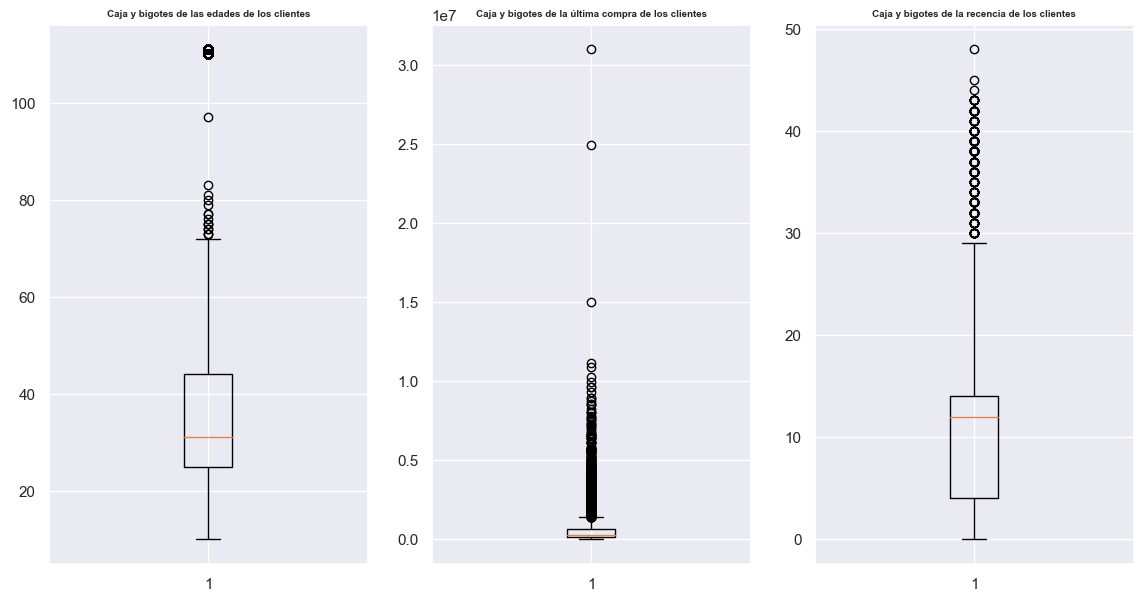

In [3]:
fig = plt.figure(figsize=(14,7))

# Caja y bigotes de la edad 
plt.subplot(1, 3, 1)
box_1 = plt.boxplot(data['Edad'])
plt.title('Caja y bigotes de las edades de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del moto total de la última compra
plt.subplot(1, 3, 2)
plt.boxplot(data['Monto Total de ultima compra'])
plt.title('Caja y bigotes de la última compra de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del tiempo transcurrido en semanas desde la última compra
plt.subplot(1, 3, 3)
plt.boxplot(data['Recencia (Tiempo transcurrido en semanas desde su ultima compra)'])
plt.title('Caja y bigotes de la recencia de los clientes', fontsize=7, fontweight='bold')


In [4]:
data_1 = data[['Edad', 'Monto Total de ultima compra','Recencia (Tiempo transcurrido en semanas desde su ultima compra)']]
data_1.columns = ['edad', 'monto_total', 'recencia']

# Calcular el IQR (rango intercuartil) de la edad
Q1 = data_1['edad'].quantile(0.25)
Q3 = data_1['edad'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = data_1[(data_1['edad'] < limite_inferior) | (data_1['edad'] > limite_superior)]

# Calcular el porcentaje de valores atípicos
porcentaje_atipicos_edad = (len(valores_atipicos) / len(data_1['edad'])) * 100

print(f"Porcentaje de datos atípicos de la edad: {porcentaje_atipicos_edad:.2f}%")

data_1['edad'] = np.clip(data_1['edad'], limite_inferior, limite_superior)



Porcentaje de datos atípicos de la edad: 10.65%


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_5492\2952678955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['edad'] = np.clip(data_1['edad'], limite_inferior, limite_superior)


In [5]:
# Calcular el IQR (rango intercuartil) del monto
Q1 = data_1['monto_total'].quantile(0.25)
Q3 = data_1['monto_total'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = data_1[(data_1['monto_total'] < limite_inferior) | (data_1['monto_total'] > limite_superior)]

# Calcular el porcentaje de valores atípicos
porcentaje_atipicos_monto = (len(valores_atipicos) / len(data_1['monto_total'])) * 100

print(f"Porcentaje de datos atípicos del monto total: {porcentaje_atipicos_monto:.2f}%")

data_1['monto_total'] = np.clip(data_1['monto_total'], limite_inferior, limite_superior)

Porcentaje de datos atípicos del monto total: 8.94%


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_5492\2934625352.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['monto_total'] = np.clip(data_1['monto_total'], limite_inferior, limite_superior)


In [6]:
# Calcular el IQR (rango intercuartil)
Q1 = data_1['recencia'].quantile(0.25)
Q3 = data_1['recencia'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = data_1[(data_1['recencia'] < limite_inferior) | (data_1['recencia'] > limite_superior)]

# Calcular el porcentaje de valores atípicos
porcentaje_atipicos_recencia = (len(valores_atipicos) / len(data_1['recencia'])) * 100

print(f"Porcentaje de datos atípicos de la recencia: {porcentaje_atipicos_recencia:.2f}%")

data_1['recencia'] = np.clip(data_1['recencia'], limite_inferior, limite_superior)

Porcentaje de datos atípicos de la recencia: 2.78%


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_5492\301080449.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['recencia'] = np.clip(data_1['recencia'], limite_inferior, limite_superior)


Text(0.5, 1.0, 'Caja y bigotes de la recencia de los clientes')

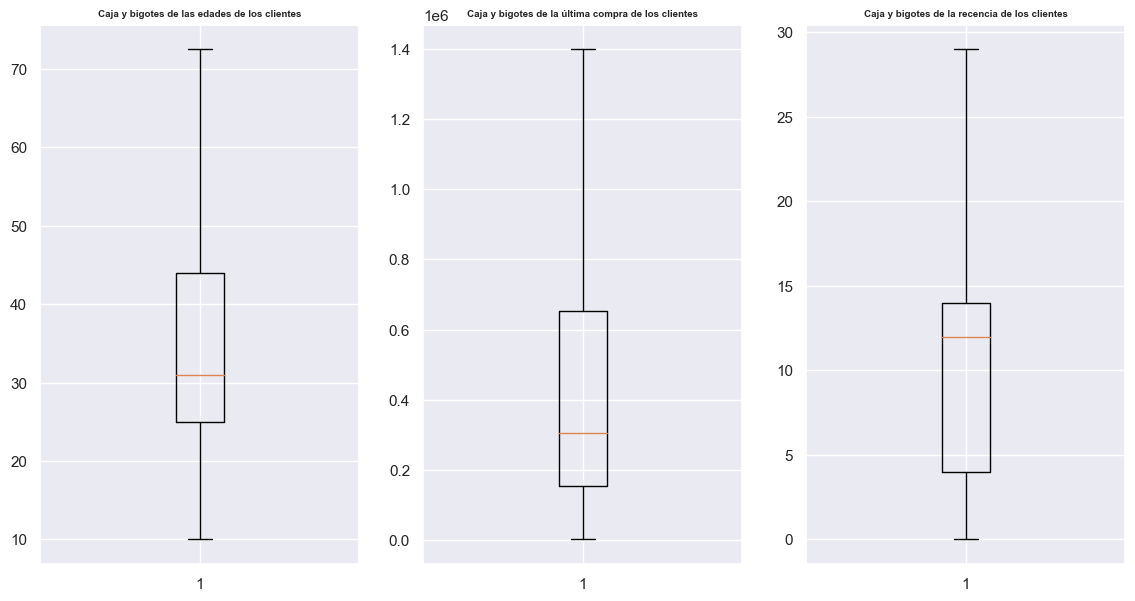

In [7]:
fig = plt.figure(figsize=(14,7))

# Caja y bigotes de la edad 
plt.subplot(1, 3, 1)
box_1 = plt.boxplot(data_1['edad'])
plt.title('Caja y bigotes de las edades de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del moto total de la última compra
plt.subplot(1, 3, 2)
plt.boxplot(data_1['monto_total'])
plt.title('Caja y bigotes de la última compra de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del tiempo transcurrido en semanas desde la última compra
plt.subplot(1, 3, 3)
plt.boxplot(data_1['recencia'])
plt.title('Caja y bigotes de la recencia de los clientes', fontsize=7, fontweight='bold')

In [8]:
# Se incluye los datos limpios a la base de datos
data['edad'] = data_1['edad']
data['monto_total'] = data_1['monto_total']
data['recencia'] = data_1['recencia']

# Se eliminas las variables originales (edad, monto total, y recencia)
data.drop(columns=['Edad', 'Monto Total de ultima compra', 'Recencia (Tiempo transcurrido en semanas desde su ultima compra)'], axis=1, inplace=True)

print(data.columns)

Index(['Segmento', 'Compro 2019?', 'Compro 2020?', 'Monto Comprado 2019?',
       'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Es Contactable', 'Ciudad de Residencia',
       'Genero', 'Estado Civil', 'Cantidad Articulos',
       'Frecuencia (Cantidad items comprados)',
       'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta',
       'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales',
       'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena',
       'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza',
       'edad', 'monto_total', 'recencia'],
      dtype='object')


In [9]:
data.columns = ['segmento', 'compra_2019', 'compra_2020', 'monto_2019', 'nro_2019', 'monto_2020', 'nro_2020', 'contactable', 'ciudad', 'genero', 'estado_civil', 'cantidad_articulos', 'frecuencia', 'monto_quilla', 'monto_cucuta', 'monto_bucara', 'monto_manizales', 'monto_pereira', 'monto_cartagena', 'monto_pasto', 'monto_clableplaza', 'edad', 'monto_total', 'recencia']

# Exporto la base de datos
nombre = 'data_clean.xlsx'
data.to_excel(nombre, index=False)

## **2. Índicadores RFM**

<p>Los indicadores de Recencia, Frecuencia y Monetario (RFM) son técnicas de segmentación de clientes basadas en datos, y nuestro conjunto de datos incluye estas características fundamentales. <p>

<p> En lo que respecta a la recencia, hemos dividido los datos en cuantiles para categorizar a los diferentes tipos de clientes. Aquellos con etiquetas "4" representan una recencia alta, lo que sugiere que han realizado compras en las últimas semanas o días. La etiqueta "3" identifica a los clientes que han realizado compras hace un tiempo, mientras que la etiqueta "2" engloba a los clientes que compran de manera esporádica. Por último, la etiqueta "1" se asigna a clientes inactivos o que solo han realizado una compra. Al observar las gráficas, notamos que estas categorías están distribuidas de manera bastante equitativa. La categoría "3" es la más común, con la mayoría de los clientes comprando entre 1 y 3 meses atrás. Sin embargo, una cuarta parte de los clientes parecen no haber comprado en mucho tiempo. <p>

<p> En cuanto a la frecuencia, hemos creado categorías que van desde "1" hasta "5", donde "1" representa a los clientes que compran con mayor frecuencia y "5" a aquellos que lo hacen con menor frecuencia. Este indicador se comporta de manera efectiva, ya que más del 80% de los clientes se encuentran en la categoría "1". <p>

<p> En lo que respecta al indicador monetario, hemos definido este como el monto total gastado y un promedio entre los gastos de 2019 y 2020. La mayor parte de los gastos totales se concentra alrededor de los 200.000, pero en el extremo de la cola del histograma, encontramos valores cercanos a 1.400.000. Más del 80% de los clientes tienen un promedio de gasto que ronda los 90.000, y solo un pequeño porcentaje realiza compras por encima de ese valor. <p>

<p> Por último, se ha calculado el gasto promedio de cada artículo comprado, el cual es de 100.000, lo que indica que la mayoría de los clientes compran un solo artículo cuyo precio se acerca a los 100.000. <p>

In [10]:
#índicadores RFM

# Recencia
data['recencia_score'] = pd.qcut(data['recencia'], q=4, labels=[4, 3, 2, 1])

#Frecuencia
bins = [0, 10, 20, 30, 40, max(data['frecuencia'])]
data['frecuencia_score'] = pd.cut(data['frecuencia'], bins=bins, labels=False) + 1


# Monetario
data['monetary_score'] = data['monto_total']
data['promedio_gasto'] = (data['monto_2019'] + data['monto_2020']) / 2
mean_monetary = data['monetary_score'].mean()
mean_promedio_gasto = data['promedio_gasto'].mean()

# Gasto por artículo
data['promedio_gasto_por_articulo'] = data['monto_total'] / data['cantidad_articulos']


### **2.1. Índicador de recencia y frecuencia**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '5'),
  Text(4, 0, '4')])

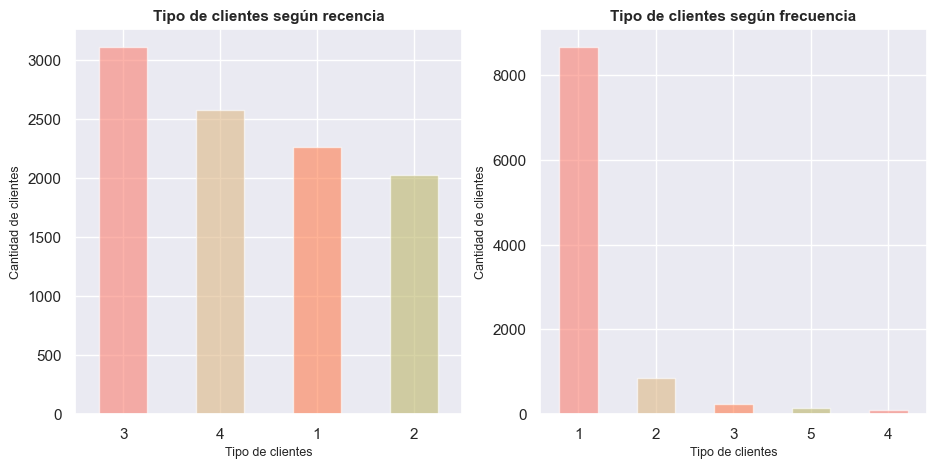

In [11]:
fig = plt.figure(figsize=(11,5))
# Recencia 
plt.subplot(1, 2, 1)
recencia_counts = data['recencia_score'].value_counts()
ax = recencia_counts.plot(kind='bar', color=['salmon', '#DEB887', '#FF7F50', '#BDB76B'], alpha=0.6, legend= False)

plt.title('Tipo de clientes según recencia', fontsize=11, fontweight='bold')
plt.xlabel('Tipo de clientes', fontsize=9)
plt.ylabel('Cantidad de clientes', fontsize=9)
plt.xticks(rotation=0)

# Frecuencia 
plt.subplot(1, 2, 2)
frecuencia_counts = data['frecuencia_score'].value_counts()
bx = frecuencia_counts.plot(kind='bar', color=['salmon', '#DEB887', '#FF7F50', '#BDB76B'], alpha=0.6, legend= False)

plt.title('Tipo de clientes según frecuencia', fontsize=11, fontweight='bold')
plt.xlabel('Tipo de clientes', fontsize=9)
plt.ylabel('Cantidad de clientes', fontsize=9)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aficionados'),
  Text(1, 0, 'Esporádicos'),
  Text(2, 0, 'Curiosos'),
  Text(3, 0, 'Inactivo'),
  Text(4, 0, 'Adictos')])

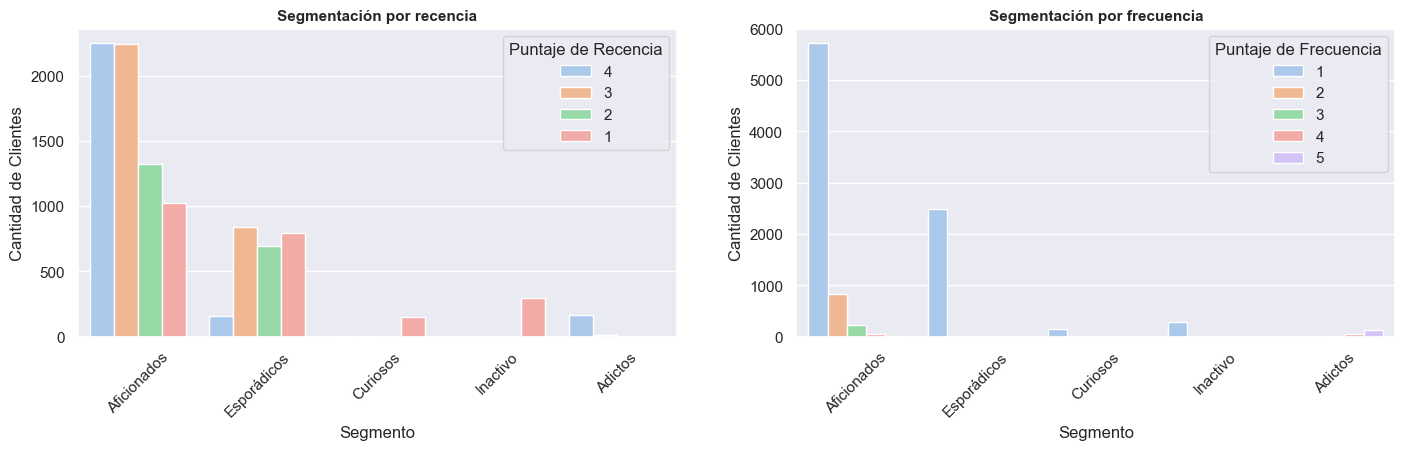

In [12]:
fig = plt.figure(figsize=(17,4))

# Segmentación recencia
plt.subplot(1, 2, 1)
sns.countplot(x='segmento', hue='recencia_score', data=data, palette='pastel')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Clientes')
plt.title('Segmentación por recencia', fontsize=11, fontweight='bold')
plt.legend(title='Puntaje de Recencia', loc='upper right')
plt.xticks(rotation=45)

# Segmentación frecuencia

plt.subplot(1, 2, 2)
sns.countplot(x='segmento', hue='frecuencia_score', data=data, palette='pastel')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Clientes')
plt.title('Segmentación por frecuencia', fontsize=11, fontweight='bold')
plt.legend(title='Puntaje de Frecuencia', loc='upper right')
plt.xticks(rotation=45)

### **2.2. Indicador de monetario**

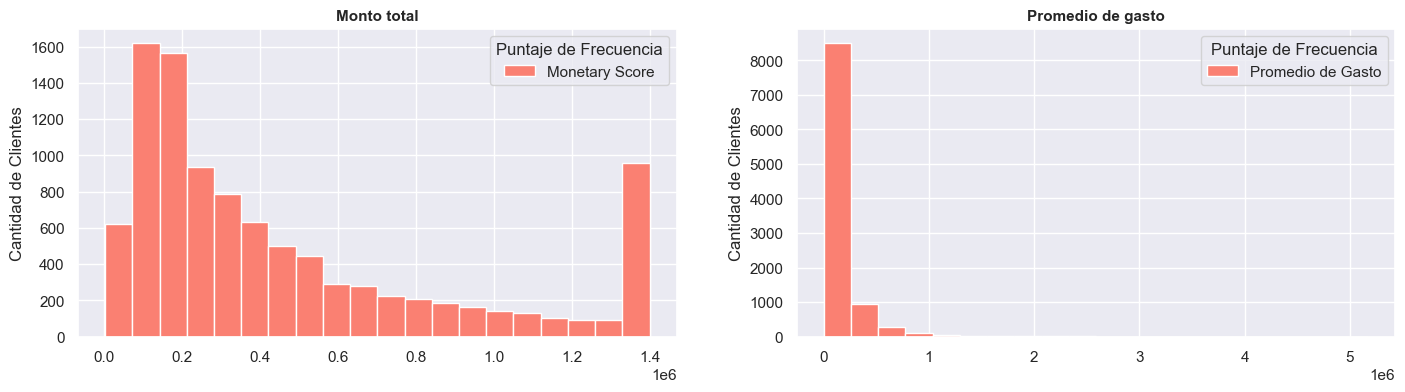

In [13]:
fig = plt.figure(figsize=(17,4))
monetary_gasto = data[['monetary_score', 'promedio_gasto']]

# Monetario total
plt.subplot(1, 2, 1)
plt.hist(monetary_gasto['monetary_score'], bins=20, label='Monetary Score', color='salmon')
plt.ylabel('Cantidad de Clientes')
plt.title('Monto total', fontsize=11, fontweight='bold')
plt.legend(title='Puntaje de Frecuencia', loc='upper right')


# Promedio de gasto
plt.subplot(1, 2, 2)
plt.hist(monetary_gasto['promedio_gasto'], bins=20, label='Promedio de Gasto', color='salmon')
plt.ylabel('Cantidad de Clientes')
plt.title('Promedio de gasto', fontsize=11, fontweight='bold')
plt.legend(title='Puntaje de Frecuencia', loc='upper right')


### **2.3. Índicador de gasto por artículo**

Text(0.5, 1.0, 'Histograma de Gasto Promedio por Artículo')

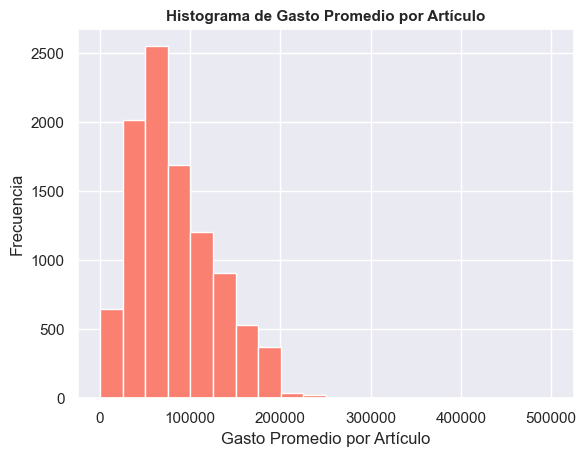

In [14]:
plt.hist(data['promedio_gasto_por_articulo'], bins=20, color='salmon', edgecolor='white', label='Promedio de gasto por artículo')
plt.xlabel('Gasto Promedio por Artículo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Gasto Promedio por Artículo', fontsize=11, fontweight='bold')

### **3. Procesamiento de matrices y vectores ML**

<p>Se realizaron transformaciones fundamentales en la base de datos para mejorar su idoneidad en el contexto del modelado. Estas transformaciones incluyeron la conversión de variables categóricas en valores flotantes que representan sus categorías respectivas. Por ejemplo, la variable "segmento" se codificó como 1 para representar a los "Aficionados" y "Adictos" y 0 para representar al restantes. Este enfoque se aplicó también a otras variables categóricas como el "estado civil", "genero" "segmento" y la indicación de si el cliente realizó compras en 2019 y 2020. Esta transformación fue necesaria debido a que el modelo requería que las variables fueran numéricas y no cadenas de texto. <p>

<p> Adicionalmente, para las variables cuantitativas, se observó que la desviación estándar superaba tanto la media como la mediana. Por lo tanto, se aplicó una transformación logarítmica natural con el fin de reducir la varianza y mejorar la idoneidad del modelo de clasificación. Además, se tienen planeadas otras transformaciones, como el balanceo de datos y el escalado, que se aplicarán al dividir los datos en conjuntos de entrenamiento y prueba. Estas medidas adicionales contribuirán a mejorar aún más la capacidad predictiva del modelo. <p>

In [15]:
# Estadísticas descriptivas 
data.describe()

,monto_2019,nro_2019,monto_2020,nro_2020,cantidad_articulos,frecuencia,monto_quilla,monto_cucuta,monto_bucara,monto_manizales,...,monto_cartagena,monto_pasto,monto_clableplaza,edad,monto_total,recencia,frecuencia_score,monetary_score,promedio_gasto,promedio_gasto_por_articulo
count,9.976000e+03,9976.000000,9.976000e+03,9976.000000,9976.000000,9976.000000,9.976000e+03,9976.0,9.976000e+03,9.976000e+03,...,9.976000e+03,9.976000e+03,9.976000e+03,9976.000000,9.976000e+03,9976.000000,9976.000000,9.976000e+03,9.976000e+03,9976.000000
mean,2.438670e+05,2.462711,2.506701e+04,0.263532,11.969326,5.775160,2.880253e+04,0.0,1.075166e+04,4.082023e+04,...,2.657350e+04,1.007549e+04,4.414807e+04,36.368184,4.676912e+05,10.206496,1.213913,4.676912e+05,1.344670e+05,83075.656136
std,4.564346e+05,4.698831,1.322477e+05,1.287152,36.553076,9.595314,2.297282e+05,0.0,8.808698e+04,1.862319e+05,...,3.735475e+05,1.101333e+05,2.443962e+05,15.913788,4.149339e+05,6.562173,0.656680,4.149339e+05,2.565911e+05,45864.660280
min,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,1.900000e+03,0.000000,1.000000,1.900000e+03,0.000000e+00,642.089261
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,25.000000,1.548000e+05,4.000000,1.000000,1.548000e+05,0.000000e+00,48600.000000
50%,1.134850e+05,1.000000,0.000000e+00,0.000000,4.000000,3.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,31.000000,3.037000e+05,12.000000,1.000000,3.037000e+05,5.995000e+04,72900.000000
75%,2.886250e+05,3.000000,0.000000e+00,0.000000,10.000000,6.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,44.000000,6.525250e+05,14.000000,1.000000,6.525250e+05,1.562775e+05,111367.857143
max,9.231860e+06,92.000000,6.448400e+06,60.000000,2179.000000,301.000000,6.928460e+06,0.0,3.513565e+06,4.900940e+06,...,3.100418e+07,6.119336e+06,7.644480e+06,72.500000,1.399112e+06,29.000000,5.000000,1.399112e+06,5.175150e+06,499900.000000


In [16]:
# Tranformación de variables categoricas

# Segmento de clientes
data['segmento_label'] = data['segmento'].replace({'Aficionados':1, 'Esporádicos':0, 'Inactivo':0, 'Adictos':1, 'Curiosos':0})
# Género
data['genero_label'] = data['genero'].replace({'Mujer':0, 'Hombre':1})
# Estado civil 
data['estado_civil_label'] = data['estado_civil'].replace({'No hay informacion':0, 'Soltero':1, 'Casado':2, 'Unión Libre':3, 'Divorciado':4, 'Viudo':5})
# Compras del 2019 y 2020
data['compra_2019_label'] = data['compra_2019'].replace({'No':0, 'Si':1})
data['compra_2020_label'] = data['compra_2020'].replace({'No':0, 'Si':1})

In [17]:
# Lista de columnas a las que aplicar el logaritmo
columnas_log = ['monto_2019', 'nro_2019', 'monto_2020', 'nro_2020', 'cantidad_articulos', 'frecuencia', 'monto_quilla',
                'monto_cucuta', 'monto_bucara', 'monto_manizales', 'monto_pereira', 'monto_cartagena', 'monto_pasto',
                'monto_clableplaza', 'edad', 'monto_total', 'recencia', 'recencia_score', 'frecuencia_score',
                'monetary_score', 'promedio_gasto', 'promedio_gasto_por_articulo']

# Itera a través de las columnas del DataFrame
for columnas_log in data.columns:
    # Verifica si la columna es de tipo float
    if data[columnas_log].dtype == 'float64':  # Ajusta el tipo de datos según corresponda
        # Aplica el logaritmo natural
        data[columnas_log] = np.log(data[columnas_log] + 1)  # Suma 1 para evitar el logaritmo de 0


In [18]:
nombre = 'data_clean.xlsx'
data.to_excel(nombre, index=False)

### **4. Modelos más utilizados en sector financiero como referencia Retail**

<p>Los modelos ampliamente empleados en el sector financiero incluyen el modelo K-means, que se utiliza para agrupar objetos en K grupos en función de sus características individuales. Este proceso de agrupación se lleva a cabo minimizando la suma de las distancias entre cada objeto y el centroide de su respectivo grupo o clúster. De esta manera, es posible identificar perfiles de clientes y ofrecer servicios financieros adaptados a sus necesidades. Por ejemplo, un grupo identificado mediante K-means podría consistir en personas pensionadas con ingresos superiores a dos salarios mínimos, lo que permitiría a las instituciones financieras ofrecer microcréditos con tasas de interés preferenciales a este tipo de clientes. Además, en el sector financiero, también se recurre a modelos de árboles de decisión tanto para tareas de clasificación como de regresión. <p>

<p> Los modelos más destacados en este ámbito se centran en la predicción del riesgo crediticio, la detección de fraudes, la mejora de la eficiencia operativa y el análisis y segmentación de la clientela. <p>

<p> Para una empresa de retail, es posible aplicar técnicas de segmentación de clientes utilizando modelos como K-means y árboles de decisión, tomando en cuenta variables como la edad, la frecuencia de compra, la recencia de las compras y la capacidad económica (monto total gastado). Estos modelos pueden ayudar a comprender mejor el comportamiento de los clientes y diseñar estrategias de marketing y ventas más efectivas en el entorno minorista. <p>

### **5. Funcionamiento y uso de modelo de fuga de clientes**

<p> El modelo de predicción de churn, o fuga de clientes, es una estrategia empresarial que se utiliza para anticipar cuándo es probable que los clientes dejen de utilizar o adquirir productos y servicios de la empresa. Este enfoque permite tomar medidas preventivas con el objetivo de reducir la tasa de churn, es decir, la pérdida de clientes. Un ejemplo ilustrativo de este concepto sería el siguiente: si una empresa comienza el año con 1000 clientes y finaliza con 950, la tasa de abandono sería del 5%.<p>